In [1]:
import pandas as pd
import numpy as np

In [4]:
data= pd.read_csv("delivery_time.csv")
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [7]:
data.shape

(21, 2)

In [9]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [14]:
from scipy.stats import kurtosis
from scipy.stats import skew

In [19]:
data1 = data.rename(columns = {'Delivery Time': 'DT', 'Sorting Time': 'ST'}, inplace = False)

In [21]:
print('Skewness of Delivery Time=',skew(data1.DT))
print('Skewness of Sorting Time=', skew(data1.ST))

Skewness of Delivery Time= 0.326702631656106
Skewness of Sorting Time= 0.043680994983108075


In [22]:
print('Kurtosis of Delivery Time=',kurtosis(data1.DT))
print('Kurtosis of Sorting Time=', kurtosis(data1.ST))

Kurtosis of Delivery Time= -0.02558576894549036
Kurtosis of Sorting Time= -1.1653901357029155


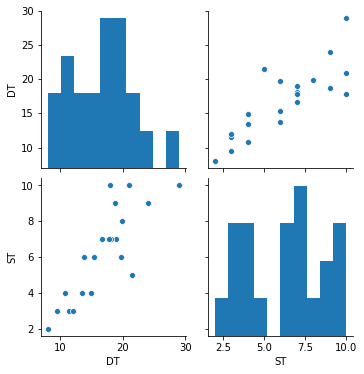

In [23]:
import seaborn as sns
sns.pairplot(data1)

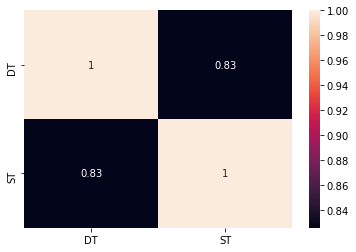

In [25]:
import matplotlib.pyplot as plt
corrMatrix = data1.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

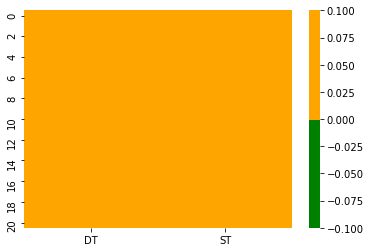

In [35]:
cols = data1.columns 
colours = ['green', 'orange']
sns.heatmap(data1[cols].isnull(),
            cmap=sns.color_palette(colours))

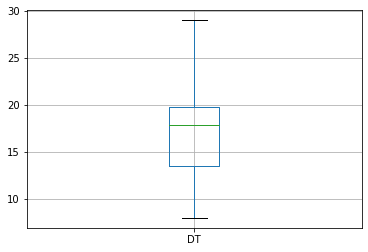

In [36]:
data1.boxplot(column=['DT'])

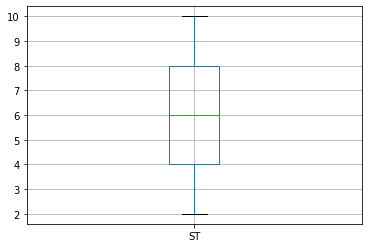

In [37]:
data1.boxplot(column=['ST'])

In [38]:
## We observe that there isn't any outliers in the data.

In [39]:
data1[data1.duplicated()].shape

(0, 2)

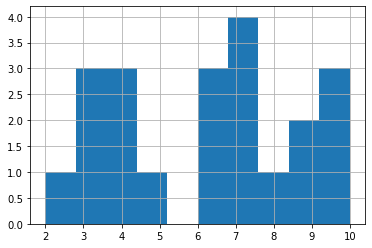

In [40]:
data1['ST'].hist()

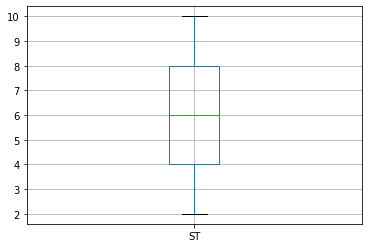

In [41]:
data1.boxplot(column=['ST'])

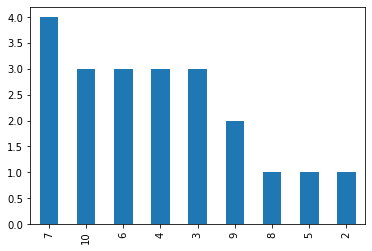

In [42]:
data1['ST'].value_counts().plot.bar()

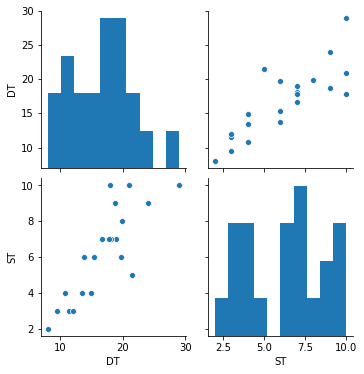

In [43]:
sns.pairplot(data1)

In [44]:
data1.corr()

,DT,ST
DT,1.000000,0.825997
ST,0.825997,1.000000


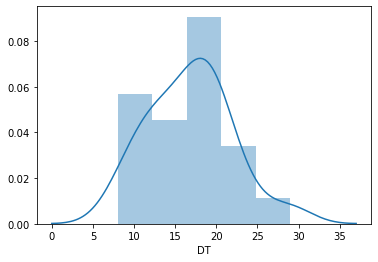

In [46]:
sns.distplot(data1['DT'])

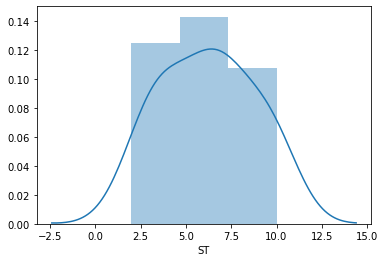

In [47]:
sns.distplot(data1['ST'])

In [48]:
import statsmodels.formula.api as smf
model = smf.ols("DT~ST",data = data1).fit()

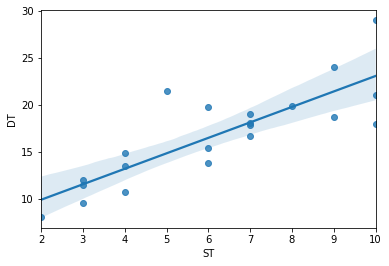

In [50]:
sns.regplot(x="ST", y="DT", data=data1);

In [51]:
model.params

Intercept    6.582734
ST           1.649020
dtype: float64

In [53]:
print(model.tvalues,'\n',model.pvalues)

Intercept    3.823349
ST           6.387447
dtype: float64 
 Intercept    0.001147
ST           0.000004
dtype: float64


In [54]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [55]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 29 Jun 2021   Prob (F-statistic):           3.98e-06
Time:                        08:58:53   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
ST             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

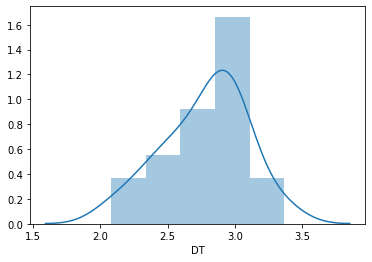

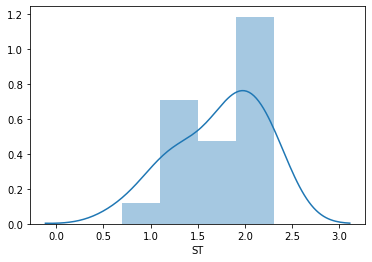

<Figure size 432x288 with 0 Axes>

In [56]:
data2=data1
data2['DT'] = np.log(data2['DT'])
data2['ST'] = np.log(data2['ST'])
sns.distplot(data2['DT'])
fig = plt.figure()
sns.distplot(data2['ST'])
fig = plt.figure()

In [58]:
model2 = smf.ols("ST~DT",data = data2).fit()

In [59]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ST   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Tue, 29 Jun 2021   Prob (F-statistic):           1.60e-07
Time:                        09:01:04   Log-Likelihood:                 2.1913
No. Observations:                  21   AIC:                           -0.3826
Df Residuals:                      19   BIC:                             1.706
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8573      0.450     -4.131      0.001      -2.798      -0.916
DT             1.2923      0.161      8.024      0.000       0.955       1.629
==============================================================================
Omnibus:                        0.197   Durbin-Watson:                   1.365
Prob(Omnibus):                  0.906   Jarque-Bera (JB):                0.258
Skew:                          -0.192   Prob(JB):                        0.879
Kurtosis:                       2.617   Cond. No.                         28.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

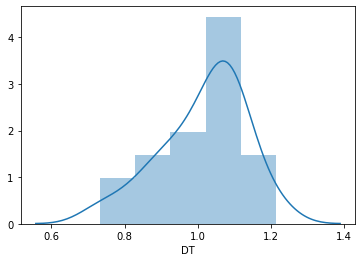

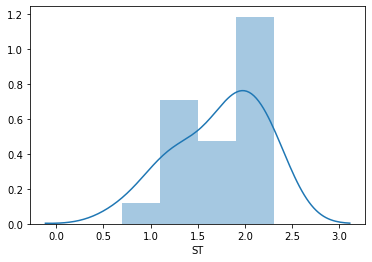

<Figure size 432x288 with 0 Axes>

In [60]:
data3=data1
data3['DT'] = np.log(data3['DT'])
sns.distplot(data3['DT'])
fig = plt.figure()
sns.distplot(data3['ST'])
fig = plt.figure()

In [62]:
model3 = smf.ols("ST~DT",data = data3).fit()

In [64]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ST   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     69.40
Date:                Tue, 29 Jun 2021   Prob (F-statistic):           9.13e-08
Time:                        09:05:50   Log-Likelihood:                 2.8038
No. Observations:                  21   AIC:                            -1.608
Df Residuals:                      19   BIC:                            0.4814
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8026      0.427     -4.225      0.000      -2.696      -0.910
DT             3.4823      0.418      8.331      0.000       2.607       4.357
==============================================================================
Omnibus:                        0.491   Durbin-Watson:                   1.273
Prob(Omnibus):                  0.782   Jarque-Bera (JB):                0.353
Skew:                          -0.289   Prob(JB):                        0.838
Kurtosis:                       2.737   Cond. No.                         17.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

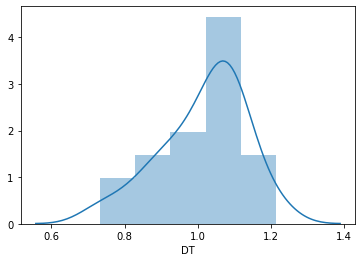

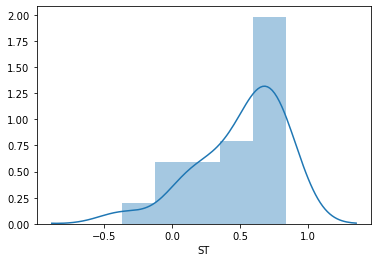

<Figure size 432x288 with 0 Axes>

In [65]:
data4=data1
data4['ST'] = np.log(data4['ST'])
sns.distplot(data4['DT'])
fig = plt.figure()
sns.distplot(data4['ST'])
fig = plt.figure()

In [66]:
model4 = smf.ols("ST~DT",data = data4).fit()

In [67]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ST   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     77.21
Date:                Tue, 29 Jun 2021   Prob (F-statistic):           4.05e-08
Time:                        09:08:24   Log-Likelihood:                 11.820
No. Observations:                  21   AIC:                            -19.64
Df Residuals:                      19   BIC:                            -17.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.9199      0.278     -6.913      0.000      -2.501      -1.339
DT             2.3908      0.272      8.787      0.000       1.821       2.960
==============================================================================
Omnibus:                        1.317   Durbin-Watson:                   1.506
Prob(Omnibus):                  0.518   Jarque-Bera (JB):                0.968
Skew:                          -0.237   Prob(JB):                        0.616
Kurtosis:                       2.061   Cond. No.                         17.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""